In [4]:
import glob
import re

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import scienceplots

plt.style.use("science")

In [5]:
activations = ["rKAN2", "rKAN3", "rKAN4", "rKAN5", "rKAN6"]
mapping = {
    "rKAN2": "rKAN(2)",
    "rKAN3": "rKAN(3)",
    "rKAN4": "rKAN(4)",
    "rKAN5": "rKAN(5)",
    "rKAN6": "rKAN(6)",
}
names = []
for i in range(0, len(activations)):
    names.append(mapping[activations[i]])

In [6]:
DATA = []
SCORES = []
for activation in activations:
    files = sorted(glob.glob("data/*%s*.txt" % activation))
    data = []
    score = []
    for file in files:
        history, score_ = list(
            map(lambda t: eval(str.strip(t)), open(file).readlines())
        )
        d = (
            history["loss"],
            history["val_loss"],
            history["accuracy"],
            history["val_accuracy"],
        )
        data.append(d)
        score.append(score_)
    DATA.append(data)
    SCORES.append(score)
DATA = np.array(DATA)
SCORES = np.array(SCORES)
DATA.shape, SCORES.shape

((5, 4, 4, 30), (5, 4, 2))

In [7]:
log = lambda x: np.log(x) / np.log(50)
DATA[:, :, :2, :] = log(DATA[:, :, :2, :])
mean = (DATA).mean(axis=1)
var = (DATA).var(axis=1)

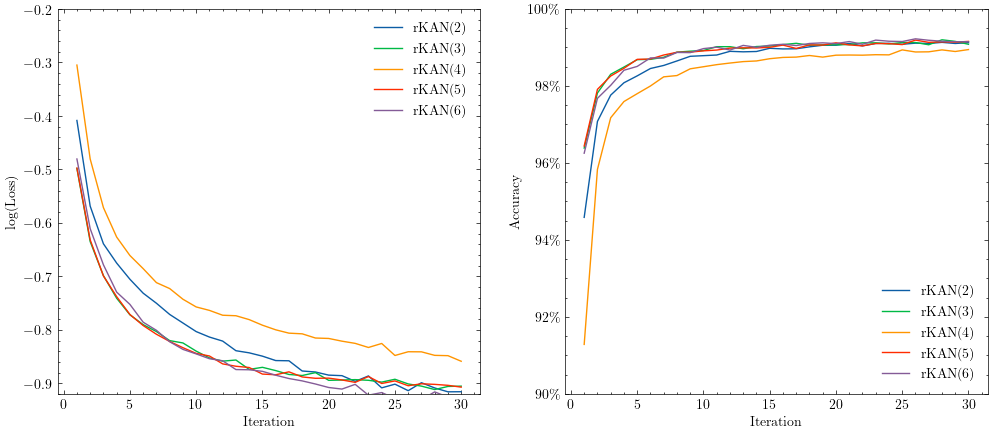

In [10]:
x = list(range(1, 1 + 30))


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
metric = 1
for i in range(0, len(activations)):
    activation = mapping[activations[i]]
    axs[0].plot(x, mean[i, metric, :], label=activation)
    axs[0].fill_between(
        x,
        mean[i, metric, :] - var[i, metric, :],
        mean[i, metric, :] + var[i, metric, :],
        alpha=0.2,
    )
axs[0].legend()
axs[0].set_ylim(-0.92, -0.2)
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel(r"$\log(\text{Loss})$")

metric = 3
for i in range(0, len(activations)):
    activation = mapping[activations[i]]
    axs[1].plot(x, mean[i, metric, :], label=activation)
    axs[1].fill_between(
        x,
        mean[i, metric, :] - var[i, metric, :],
        mean[i, metric, :] + var[i, metric, :],
        alpha=0.2,
    )
axs[1].legend()
axs[1].set_ylim(0.9, 1)
axs[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: "%d" % (100 * x) + "\%")
)
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Accuracy")

fig.savefig("compare-accuracy-mnist.pdf", bbox_inches="tight")

In [11]:
SCORES[:, :, 1] *= 100
mean = SCORES.mean(axis=1)
std = SCORES.std(axis=1)

columns = ["Loss", "Accuracy"]
df = pd.DataFrame(index=names, columns=columns)

# Populate DataFrame with mean +- std
for i in range(mean.shape[0]):
    for j in range(mean.shape[1]):
        df.at[names[i], columns[j]] = f"{mean[i, j]:.3f} +- {std[i, j]:.3f}"

df

,Loss,Accuracy
rKAN(2),0.021 +- 0.001,99.267 +- 0.068
rKAN(3),0.022 +- 0.001,99.210 +- 0.046
rKAN(4),0.029 +- 0.001,99.060 +- 0.033
rKAN(5),0.021 +- 0.000,99.293 +- 0.060
rKAN(6),0.021 +- 0.003,99.217 +- 0.094


In [12]:
df = pd.DataFrame(
    {
        "Loss mean": mean[:, 0],
        "Loss std": std[:, 0],
        "Accuracy mean": mean[:, 1],
        "Accuracy std": std[:, 1],
    },
    index=names,
)
df.round(4)

,Loss mean,Loss std,Accuracy mean,Accuracy std
rKAN(2),0.0215,0.0012,99.2675,0.0683
rKAN(3),0.0222,0.0012,99.2100,0.0464
rKAN(4),0.0292,0.0006,99.0600,0.0332
rKAN(5),0.0213,0.0004,99.2925,0.0597
rKAN(6),0.0214,0.0027,99.2175,0.0944
